In [1]:
import json, requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
etf_list = ['VTI','VEA', 'VWO', 'VNQ', 'XLE', 'BND', 'SCHP', 'VTEB', 'VIG']
pickle_list = []
for etf in etf_list:
    pickle_name = etf + '.pickle'
    pickle_list.append(pickle_name)

In [3]:
df_list = []
for etf in pickle_list:
    df_name = 'df_' + etf[0:2]
    df_name = pd.read_pickle(etf)
    df_list.append(df_name)

In [4]:
for df in df_list:
    df['Normed Return'] = df['close'] / df.iloc[0]['close']
    df['Allocation'] = df['Normed Return'] * (1/9)
    df['Pos'] = df['Allocation'] * 100000

In [5]:
pos_ls = []
for df in df_list:
    pos_ls.append(df['Pos'])

In [6]:
portfolio_val = pd.concat(pos_ls, axis=1)

In [7]:
portfolio_val.columns = ['vti pos', 'vea pos', 'vwo pos', 'vnq pos', 'xle pos', 'bnd pos', 'schp pos', 'vteb pos', 'vig pos']

In [8]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1)

In [9]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [10]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [11]:
ASR = (252**0.5) * SR
ASR

-0.042955439539596504

In [12]:
close_ls = []
for df in df_list:
    close_ls.append(df['close'])
stocks = pd.concat(close_ls,axis=1)
stocks.columns = ['VTI','VEA', 'VWO', 'VNQ', 'XLE', 'BND', 'SCHP', 'VTEB', 'VIG']

In [13]:
stocks.head()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
0,101.20,43.17,43.36,76.09,96.81,81.84,54.93,50.068,78.27
1,101.37,43.12,43.63,75.17,96.96,81.77,54.96,50.000,78.42
2,101.35,43.04,43.80,74.61,96.80,81.61,54.87,50.000,78.27
3,101.01,42.84,43.65,74.41,97.17,81.64,54.92,49.990,77.88
4,100.29,42.85,43.45,74.22,97.49,81.85,55.08,49.975,77.29


In [14]:
mean_daily_return = stocks.pct_change(1).mean()
mean_daily_return

VTI     0.000325
VEA    -0.000007
VWO     0.000015
VNQ     0.000166
XLE    -0.000275
BND     0.000005
SCHP    0.000018
VTEB    0.000044
VIG     0.000320
dtype: float64

In [15]:
stocks.pct_change(1).corr()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
VTI,1.000000,0.833877,0.754659,0.563090,0.698502,-0.235670,-0.184602,0.012135,0.951163
VEA,0.833877,1.000000,0.832952,0.466681,0.653292,-0.180167,-0.120493,-0.002126,0.790109
VWO,0.754659,0.832952,1.000000,0.440541,0.608902,-0.092811,-0.041933,0.008688,0.713737
VNQ,0.563090,0.466681,0.440541,1.000000,0.303884,0.177414,0.145521,0.047887,0.586203
XLE,0.698502,0.653292,0.608902,0.303884,1.000000,-0.197864,-0.062194,-0.012842,0.629296
BND,-0.235670,-0.180167,-0.092811,0.177414,-0.197864,1.000000,0.810229,0.021676,-0.194512
SCHP,-0.184602,-0.120493,-0.041933,0.145521,-0.062194,0.810229,1.000000,-0.002158,-0.169056
VTEB,0.012135,-0.002126,0.008688,0.047887,-0.012842,0.021676,-0.002158,1.000000,0.019005
VIG,0.951163,0.790109,0.713737,0.586203,0.629296,-0.194512,-0.169056,0.019005,1.000000


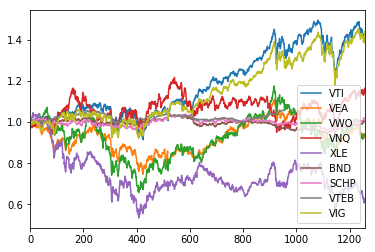

In [16]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [17]:
stock_daily_return = stocks.pct_change(1)
stock_daily_return.head()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001680,-0.001158,0.006227,-0.012091,0.001549,-0.000855,0.000546,-0.001358,0.001916
2,-0.000197,-0.001855,0.003896,-0.007450,-0.001650,-0.001957,-0.001638,0.000000,-0.001913
3,-0.003355,-0.004647,-0.003425,-0.002681,0.003822,0.000368,0.000911,-0.000200,-0.004983
4,-0.007128,0.000233,-0.004582,-0.002553,0.003293,0.002572,0.002913,-0.000300,-0.007576


In [18]:
log_ret = np.log(stocks/stocks.shift(1))
pickle_path = os.path.join(os.path.join(os.path.dirname(os.getcwd()), 'data', 'log_ret.pickle'))
log_ret.to_pickle(pickle_path)
log_ret.head()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001678,-0.001159,0.006208,-0.012165,0.001548,-0.000856,0.000546,-0.001359,0.001915
2,-0.000197,-0.001857,0.003889,-0.007478,-0.001652,-0.001959,-0.001639,0.000000,-0.001915
3,-0.003360,-0.004658,-0.003431,-0.002684,0.003815,0.000368,0.000911,-0.000200,-0.004995
4,-0.007154,0.000233,-0.004592,-0.002557,0.003288,0.002569,0.002909,-0.000300,-0.007605


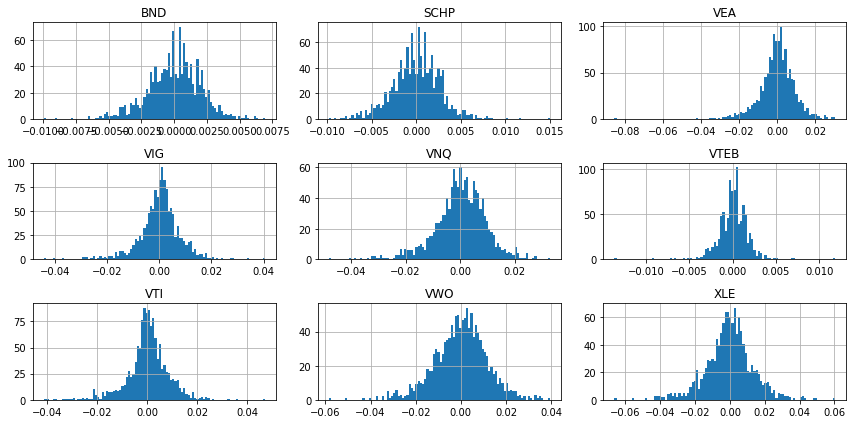

In [19]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [20]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VTI,1258.0,0.000288,0.008501,-0.041034,-0.003195,0.000466,0.004677,0.046998
VEA,1258.0,-0.000047,0.009027,-0.085445,-0.004326,0.000269,0.004880,0.030285
VWO,1258.0,-0.000053,0.011670,-0.058303,-0.006821,0.000651,0.007200,0.039494
VNQ,1258.0,0.000122,0.009371,-0.047946,-0.004785,0.000507,0.005964,0.032907
XLE,1258.0,-0.000367,0.013597,-0.066400,-0.007478,-0.000139,0.006968,0.060362
BND,1258.0,0.000003,0.002019,-0.009938,-0.001228,0.000122,0.001314,0.006927
SCHP,1258.0,0.000014,0.002663,-0.009766,-0.001617,0.000090,0.001769,0.015023
VTEB,951.0,0.000057,0.001653,-0.013662,-0.000783,0.000192,0.000985,0.011823
VIG,1258.0,0.000290,0.007768,-0.044028,-0.003369,0.000728,0.004343,0.040440


In [21]:
log_ret.mean() * 252

VTI     0.072690
VEA    -0.011950
VWO    -0.013273
VNQ     0.030695
XLE    -0.092555
BND     0.000684
SCHP    0.003578
VTEB    0.014480
VIG     0.073064
dtype: float64

In [22]:
log_ret.cov() * 252

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
VTI,0.018212,0.016119,0.018872,0.011296,0.020354,-0.001019,-0.001053,0.000052,0.015831
VEA,0.016119,0.020533,0.022112,0.009918,0.020200,-0.000829,-0.000734,-0.000008,0.013955
VWO,0.018872,0.022112,0.034321,0.012134,0.024349,-0.000553,-0.000332,0.000052,0.016312
VNQ,0.011296,0.009918,0.012134,0.022131,0.009753,0.000849,0.000918,0.000220,0.010752
XLE,0.020354,0.020200,0.024349,0.009753,0.046587,-0.001369,-0.000573,-0.000076,0.016766
BND,-0.001019,-0.000829,-0.000553,0.000849,-0.001369,0.001027,0.001098,0.000021,-0.000768
SCHP,-0.001053,-0.000734,-0.000332,0.000918,-0.000573,0.001098,0.001787,-0.000002,-0.000881
VTEB,0.000052,-0.000008,0.000052,0.000220,-0.000076,0.000021,-0.000002,0.000688,0.000073
VIG,0.015831,0.013955,0.016312,0.010752,0.016766,-0.000768,-0.000881,0.000073,0.015208


In [ ]:
num_ports = 1000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.array(np.random.random(9))
    weights = weights / np.sum(weights)
    all_weights[ind, :] = weights
    
    ret_arr[ind] = np.sum((log_ret.mean()*weights)*252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [ ]:
m = sharpe_arr.argmax()
all_weights[m,:]
sharpe_arr.max()

In [ ]:
max_sr_ret = ret_arr[m]
max_sr_vol = vol_arr[m]

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
